# COMPREHENSION DU PROBLÈME

## 1) OBJECTIFS DU PROJET

LE PROJET SE FERA EN 2 GRANDES ÉTAPES. DANS LA PREMIÈRE IL S'AGIRA DE CLASSIFIER LES ALERTES POUR AVOIR LES VRAIES ALERTES ET ENSUITE FAIRE UNE PRIORISATION DE CES ALERTES. LOS OBJECTIFS METIERS SERONT :
- DE CLASSIFIER LES VRAIES ALERTES À PARTIR D'UN FICHIER EXCEL
- DE PRIORISER CES ALERTES PAR ORDRE DE CRITICITÉ

## 2) TYPE DE CLASSIFICATION

C'EST UNE CLASSIFICATION BINAIRE

## 3) CHOIX DES METRIQUES ATTENDUS

DANS NOTRE CAS, LES DONNÉES NE SONT PAS ÉQUILIBRÉES, ET NOTRE OBECTIF EST DE NON SEULEMENT DIMINUER, SOIT IGNORER LES FAUX POSITIFS, MAIS AUSSI, DE NE PAS RATER LES VRAIS POSITIFS, NOS MÉTRIQUES SERONT :
- LE F1-SCORE
- LA PRECISION
- LE RECALL
- AUC (UTILISÉ POUR ÉVALUER LA CAPACITÉ DE DISCRIMINATION)

NOUS FERONS AUSSI DE LA VISUALISATION DES DONNÉES POUR CONNAITRE L'ETAT DE NOS PREDICTIONS. ALORS NOUS VISUALISERONS LES COURBES SUIVANTES
- MATRICE DE CONFUSION
- COURBE ROC + AUC 
- COURBE PRECISION-RECALL

# CHARGEMENT ET EXPLORATION DES DONNÉES

## 1) CHARGEMENT DES DONNÉES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Chargement du dataset
df = pd.read_excel("data.xlsx")

print(20*"=","AFFICHAGE DES PREMIÈRES LIGNES",20*"=")
print("\n")
print(df.head())

==================== AFFICHAGE DES PREMIÈRES LIGNES ====================


   Unnamed: 0  alert_severity                     alert_type  childproc_count  \
0           0            67.5  watchlist.hit.ingress.process                3   
1           1            67.5  watchlist.hit.ingress.process                3   
2           2            67.5  watchlist.hit.ingress.process                1   
3           3            67.5  watchlist.hit.ingress.process                1   
4           4            67.5  watchlist.hit.ingress.process                3   

         comms_ip              created_time  crossproc_count     description  \
0  172.16.102.171  2020-07-09T17:49:13.759Z                0  Malicious Host   
1  172.16.102.171  2020-07-09T17:49:22.260Z                0  Malicious Host   
2  172.16.102.191  2020-07-09T18:16:39.523Z                6  Malicious Host   
3  172.16.102.191  2020-07-09T18:16:44.639Z                7  Malicious Host   
4  172.16.102.171  2020-07-09T17:48:41

## 2) DIMENSIONS DU DATASET

In [4]:
print(f"Dimensions: {df.shape}")
print("\n")
print("====================== Types de données ======================")
print("\n")
print(df.dtypes)

Dimensions: (1000, 42)


====================== Types de données ======================


Unnamed: 0              int64
alert_severity        float64
alert_type             object
childproc_count         int64
comms_ip               object
created_time           object
crossproc_count         int64
description            object
feed_id                 int64
feed_name              object
feed_rating           float64
filemod_count           int64
group                  object
hostname               object
interface_ip           object
ioc_attr               object
ioc_confidence        float64
ioc_type               object
ioc_value              object
link                   object
md5                    object
modload_count           int64
netconn_count           int64
os_type                object
process_id             object
process_name           object
process_path           object
process_unique_id      object
regmod_count            int64
report_ignored           bool
report_sco

## 3) STATISTIQUE SUR LES VALEURS DU DATASET

In [6]:
print("====================== Valeurs manquantes ====================== :")
print(df.isnull().sum())

print("\n")
print("Doublons : ",df.duplicated().sum())

====================== Valeurs manquantes ====================== :
Unnamed: 0            0
alert_severity        0
alert_type            0
childproc_count       0
comms_ip              0
created_time          0
crossproc_count       0
description           0
feed_id               0
feed_name             0
feed_rating           0
filemod_count         0
group                 0
hostname              0
interface_ip          0
ioc_attr              4
ioc_confidence        0
ioc_type              0
ioc_value             0
link                  0
md5                   0
modload_count         0
netconn_count         0
os_type               0
process_id            0
process_name          0
process_path          0
process_unique_id     0
regmod_count          0
report_ignored        0
report_score          0
segment_id            0
sensor_criticality    0
sensor_id             0
sha256                0
status                0
total_hosts           0
unique_id             0
watchlist_id         

In [7]:
print("====================== Statistiques descriptives ====================== :")
df.describe(include='all')

====================== Statistiques descriptives ====================== :


,Unnamed: 0,alert_severity,alert_type,childproc_count,comms_ip,created_time,crossproc_count,description,feed_id,feed_name,...,sensor_criticality,sensor_id,sha256,status,total_hosts,unique_id,watchlist_id,watchlist_name,labelisation,incident
count,1000.000000,1000.0,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,...,1000.0,1000.000000,1000,1000,1000.0,1000,1000,1000,1000,1000.000000
unique,NaN,NaN,1,NaN,84,1000,NaN,4,NaN,3,...,NaN,NaN,30,1,NaN,1000,4,4,2,NaN
top,NaN,NaN,watchlist.hit.ingress.process,NaN,192.168.146.39,2020-04-04T16:58:10.730Z,NaN,Malicious Host,NaN,alienvault,...,NaN,NaN,279b43da7662ce00956a51b470d0b7bb09025ccde9f03d...,Unresolved,NaN,d753f34d-3114-4793-9fe3-b13e0acb14ab,malicioushost,malicioushost,True,NaN
freq,NaN,NaN,1000,NaN,457,1,NaN,967,NaN,967,...,NaN,NaN,457,1000,NaN,1,967,967,887,NaN
mean,499.500000,67.5,NaN,4.105000,NaN,NaN,11.089000,NaN,17.724000,NaN,...,3.0,2703.672000,NaN,NaN,1572.0,NaN,NaN,NaN,NaN,0.158000
std,288.819436,0.0,NaN,12.495283,NaN,NaN,39.108369,NaN,1.505354,NaN,...,0.0,1002.962536,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.364924
min,0.000000,67.5,NaN,0.000000,NaN,NaN,0.000000,NaN,7.000000,NaN,...,3.0,266.000000,NaN,NaN,1572.0,NaN,NaN,NaN,NaN,0.000000
25%,249.750000,67.5,NaN,0.000000,NaN,NaN,0.000000,NaN,18.000000,NaN,...,3.0,1272.000000,NaN,NaN,1572.0,NaN,NaN,NaN,NaN,0.000000
50%,499.500000,67.5,NaN,0.000000,NaN,NaN,5.000000,NaN,18.000000,NaN,...,3.0,3328.000000,NaN,NaN,1572.0,NaN,NaN,NaN,NaN,0.000000
75%,749.250000,67.5,NaN,3.000000,NaN,NaN,6.000000,NaN,18.000000,NaN,...,3.0,3328.000000,NaN,NaN,1572.0,NaN,NaN,NaN,NaN,0.000000


## 4) DISTRIBUTION DE LA CLASSE

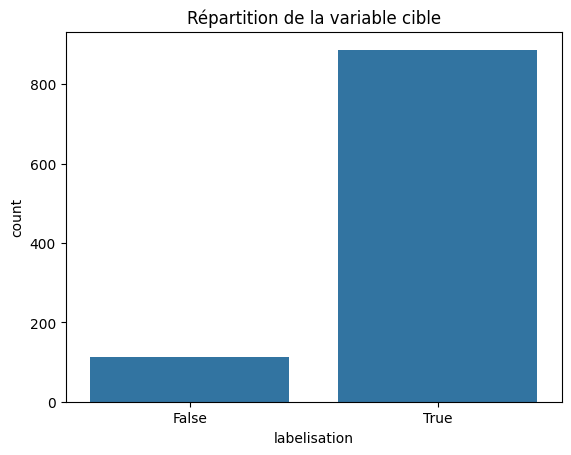

In [8]:
sns.countplot(x="labelisation", data=df)
plt.title("Répartition de la variable cible")
plt.show()

In [9]:
print("Nombre classe True : ", df[df["labelisation"] == True]["labelisation"].count())
print("Nombre classe False : ", df[df["labelisation"] != True]["labelisation"].count())

Nombre classe True :  887
Nombre classe False :  113


SOIT UN DÉSÉQUILIBRE DE *88.7%* DE CLASSE TRUE CONTRE UN TAUX DE *11.3%* DE CLASSE FALSE. COMME NOUS SOMMES DANGEREUSEMENT PROCHE DES 90% ET 10%; NOUS ALLONS EFFECTUER UN EQUILIBRAGE POUR EVITER QUE LA CLASSE MINORITAIRE SOIT IGNORÉE ET QU'ON AIT UN CAS DE SURAPPRENTISSAGE À LA FIN.

# PRETRAITEMENT DES DONNÉES

## 1) NETTOYAGE DES COLONNES INUTILES

LES COLONNES INUTILES DU DATASET À SUPPRIMER SONT :
- feed_id
- total_host
- report_score
- segment_id
- host_name
- process_id
- unique_id
- watchlist_id
- sha256
- link
- comms_ip

In [6]:
# clean_data = df.drop(["feed_id", "total_hosts", "report_score", "segment_id", "hostname", "process_id","unique_id","watchlist_id","sha256","link","comms_ip"], axis=1)

drop_cols = [
    "Unnamed: 0", "created_time", "comms_ip", "description", "feed_name", "sha256","incident"
    "process_guid", "status", "unique_id", "watchlist_id", "watchlist_name"
]

df = df.drop(columns=drop_cols, errors='ignore')

X = df.drop(columns=["labelisation"])
y = df["labelisation"]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Text(0.5, 1.0, 'Matrice de corrélation')

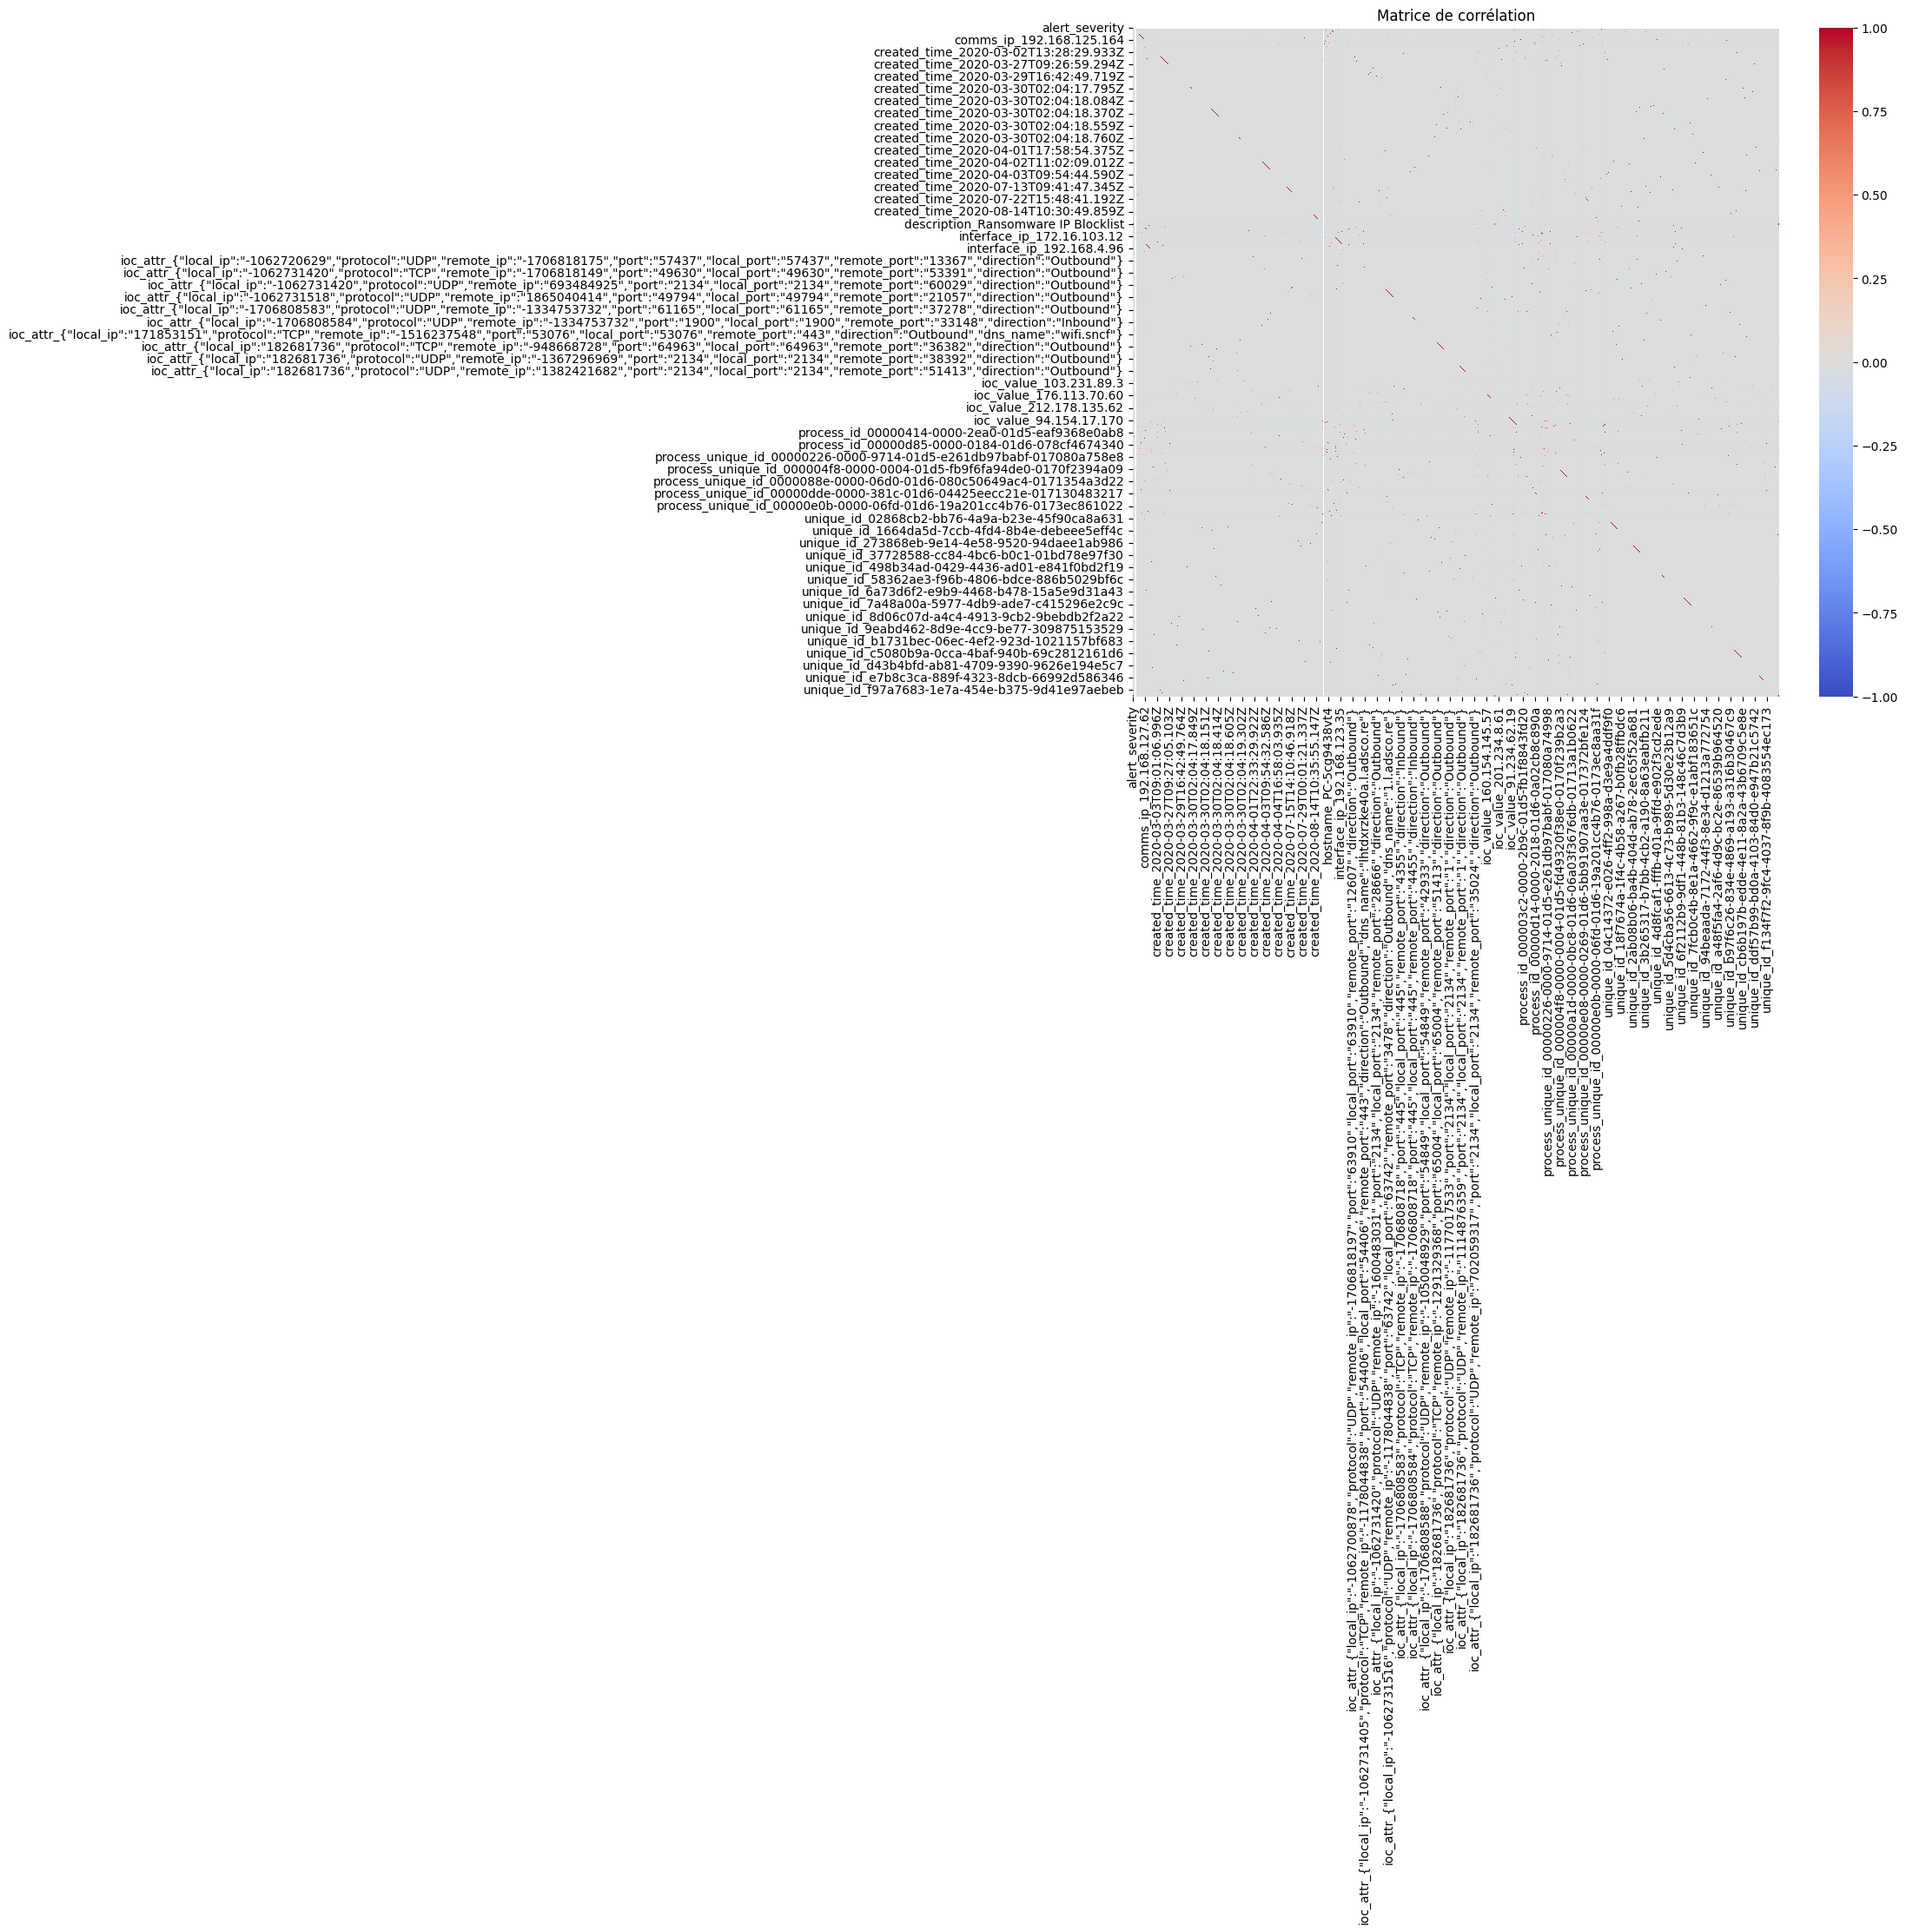

In [7]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Matrice de corrélation")

## 2) ENCODAGE DES VARIABLES CATÉGORIELLE

In [3]:
# Conversion des variables catégorielles
df = pd.get_dummies(df)

# === 3. Séparation des variables ===


## 3) STANDARDISATION

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4) TRAITEMENT DES DÉSÉQUILIBRES

In [22]:
from imblearn.over_sampling import SMOTE

# === 5. Équilibrage avec SMOTE ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# SEPARATION DES DONNEES

In [23]:
from sklearn.model_selection import train_test_split

# === 6. Split train/test ===
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# CHOIX DU MODÈLE

## 1) PARAMÉTRAGE DES MODÈLES

In [28]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# === Modèle 1 : RandomForestClassifier ===
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)

# === Modèle 2 : XGBoostClassifier ===
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

## 2) ENTRAINEMENT DES MODÈLES

In [29]:
# === Modèle 1 : RandomForestClassifier ===
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# === Modèle 2 : XGBoostClassifier ===
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

## 3) EVALUATION DES MODÈLES


 ====================  [RANDOM FOREST]  ==================== :
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.99      0.99       178
        True       0.99      1.00      0.99       177

    accuracy                           0.99       355
   macro avg       0.99      0.99      0.99       355
weighted avg       0.99      0.99      0.99       355

Matrice de Confusion:
 [[176   2]
 [  0 177]]


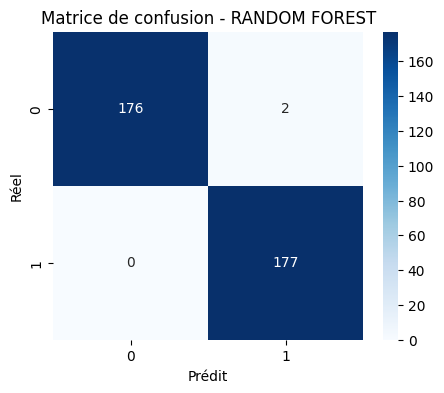


 ====================  [XGBOOST]  ==================== :
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.99      0.99       178
        True       0.99      1.00      0.99       177

    accuracy                           0.99       355
   macro avg       0.99      0.99      0.99       355
weighted avg       0.99      0.99      0.99       355

Matrice de Confusion:
 [[176   2]
 [  0 177]]


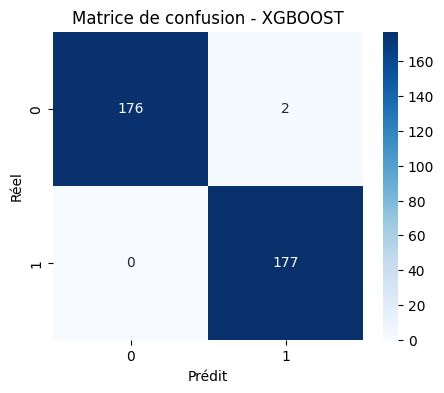

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

# === Évaluation ===
print("\n",20*"="," [RANDOM FOREST] ", 20*"=",":")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Matrice de Confusion:\n", confusion_matrix(y_test, y_pred_rf))
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Matrice de confusion - RANDOM FOREST")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

print("\n",20*"="," [XGBOOST] ", 20*"=",":")
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Matrice de Confusion:\n", confusion_matrix(y_test, y_pred_xgb))
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title(f"Matrice de confusion - XGBOOST")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

Le modèle choisit selon les différentes métriques est le XGBoostClassifier